# TASK 1:  Prediction Using Supervised ML

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
**Prepared by: Nidhi Bhatia**


##### Importing Libararies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

##### Loading the dataset

In [3]:
data = pd.read_csv("http://bit.ly/w-data")

##### Reading the first few entries 

In [4]:
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


##### Looking for the missing entries & datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Meaning there are no null values in the dataset

#### Size of the dataframe

In [6]:
data.shape

(25, 2)

Meaning there are 25  rows and 2 columns

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Plotting / Visualising the data

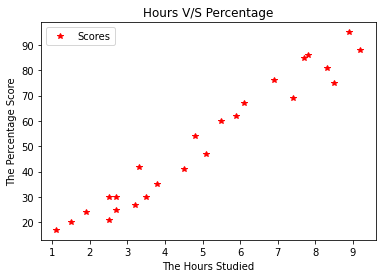

In [12]:
data.plot(x='Hours', y='Scores', style='*', color = 'red')    
plt.title('Hours V/S Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()  

Hence, the above graphs helps us to interpret that there is a positive linear relationship between our parameters.

##### Preparing the Data

In [14]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

We have divided the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Shows two dimensional array with inputs(X)

In [16]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Shows one dimensional array with output(Y)


###### Now we will split the data into training and testing sets.

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [57]:
X_train.shape

(20, 1)

In [48]:
 X_test.shape

(5, 1)

Above code shows the shape of X train and X test

##### Plotting the Training Set

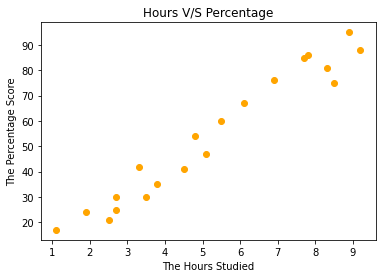

In [49]:
plt.scatter(X_train,  Y_train, c='orange')
plt.title('Hours V/S Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show()

##### Plotting the Testing Set

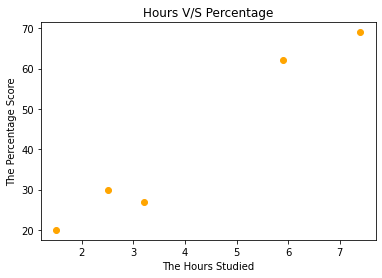

In [50]:
plt.scatter(X_test, Y_test, c="orange")
plt.title('Hours V/S Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')   
plt.show()

##### Training the Algorithm 

In [58]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression().fit(X_train, Y_train) 

print("Training is completed")

Training is completed


In [60]:
LR.intercept_

2.018160041434662

In [61]:
LR.coef_

array([9.91065648])

The above code provides the intercept and slope values of the regression line.

In [62]:
LR.score(X_train, Y_train)

0.9515510725211552

In [63]:
LR.score(X_test, Y_test)

0.9454906892105354

##### Plotting the regression line

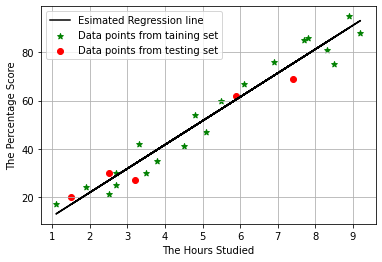

In [102]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X_train, Y_train, color = 'green',  marker='*', label='Data points from taining set')
plt.scatter(X_test, Y_test, color = 'red', label='Data points from testing set')
plt.plot(X, line, color = 'black', label='Esimated Regression line');
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')   
plt.grid()
plt.legend()
plt.show()

##### Making Predictions

In [86]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [88]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 In the above table we are comparing the actual versus predicted model to understand our model fitting.

**Testing with our own data**

In [93]:
Hours = 6.54
own_pred = regressor.predict([[Hours]])
print("Number of Hours = {}".format(Hours))
print("Prediction Score = {}".format(own_pred[0]))

Number of Hours = 6.54
Prediction Score = 66.8338534248349


##### Evaluating our model

Finally we will evaluate the performance of our algorithm.

In [100]:
from sklearn import metrics  
print('Mean Absolute Error:', 
             metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
             metrics.mean_squared_error(y_test, y_pred))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse) 

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
